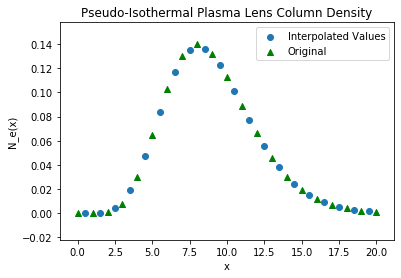

In [22]:
'''
ASTP-720 Homework 1
Zach Diermyer
Problems 5 & 6
'''
import matplotlib.pyplot as plt

def linterpolator(xp, x0, x1, y0, y1):
    '''
    Linearly interpolates a y value at the desired x value, xp, using the slope of
    the line connecting other input points
    Inputs:
        xp - X value to interpolate y value of
        x0 - First x value
        x1 - Second x value
        y0 - First y value
        y1 - Second y value
    Returns:
        yp - Interpolated y value
    '''
    xd = (xp - x0)/(x1 - x0)
    yp = y0*(1 - xd) + y1*xd
    return(yp)

def halfxinterpolate():
    '''
    Reads lens_density.txt file and interpolates all y values at midpoint x values
    Inputs:
        none
    Returns:
        newx - Midpoint x values array
        newy - Interpolated y values array
        x - Original x values array
        y - Original y values array
    '''
    data = open('lens_density.txt', 'r')
    x = []
    y = []
    while True:
        line = data.readline()
        if not line:
            break               #Exit if line is empty
        if line[0].isnumeric():
            xi = line[0:3]      #First x values are 3 character strings
            if line[3] == ',':
                yi = line[5:]   #First y values start at index 5
            else:
                xi += line[3]   #X values become one digit longer and y values get pushed 1 index back
                yi = line[6:]
            x.append(float(xi))
            y.append(float(yi))
    newx = []
    newy = []
    for i in range(1, len(x)):
        xel = (x[i] + x[i-1])/2
        newx.append(xel)
        yel = linterpolator(xp = xel, x0 = x[i-1], x1 = x[i], y0 = y[i-1], y1 = y[i])
        newy.append(yel)
    return(newx, newy, x, y)
    
def main():
    vals = halfxinterpolate()
    plt.scatter(vals[0], vals[1])
    plt.scatter(vals[2], vals[3], color = 'green', marker = '^')
    plt.xlabel('x')
    plt.ylabel('N_e(x)')
    plt.title('Pseudo-Isothermal Plasma Lens Column Density')
    plt.legend(labels = ('Interpolated Values', 'Original'))
main()